In [17]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [18]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    predictions = (sequential_model.predict(X_test_scaled) > 0.5).astype("int32")
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })

    # Convert the model_performance to a DataFrame
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [19]:
FILE_PATH ="/Users/Test/Downloads/web-page-phishing.csv"

df = pd.read_csv(FILE_PATH)
df

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100072,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100073,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
100074,70,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
100075,28,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
df.isna().sum()

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64

In [21]:
df.duplicated().sum()

78186

In [22]:
# df.drop_duplicates(inplace=True)

In [23]:
df

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100072,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100073,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
100074,70,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
100075,28,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<Axes: xlabel='phishing'>

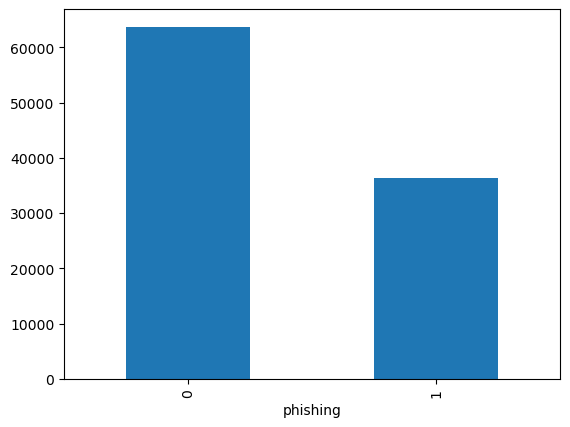

In [24]:
df["phishing"].value_counts().plot.bar()

<Axes: xlabel='n_redirection'>

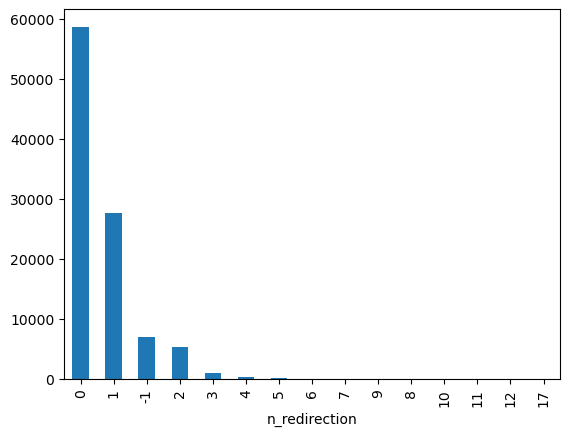

In [25]:
df["n_redirection"].value_counts().plot.bar()

<Axes: xlabel='n_percent'>

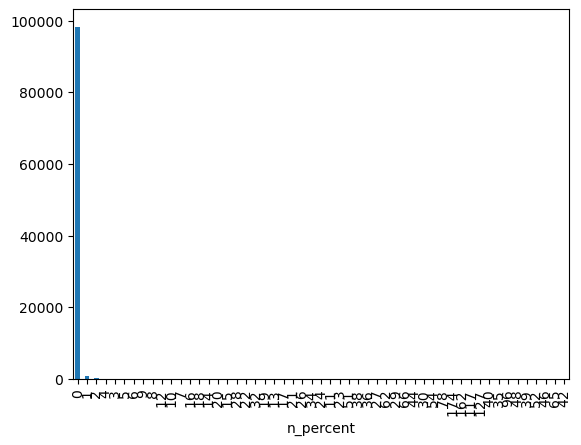

In [26]:
df["n_percent"].value_counts().plot.bar()

In [27]:
X,y = df.drop(["phishing"], axis=1), df["phishing"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)

939/939 [==============================] - 0s 259us/step


In [28]:
models

,Model,Accuracy
0,LogisticRegression,0.858280
1,SVC,0.881362
2,DecisionTreeClassifier,0.881894
3,RandomForestClassifier,0.890421
4,KNeighborsClassifier,0.884825
5,GradientBoostingClassifier,0.883327
6,GaussianNB,0.701139
7,Sequential,0.893785


In [29]:
X,y = df.drop(["phishing"], axis=1), df["phishing"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)

939/939 [==============================] - 0s 256us/step


In [30]:
models

,Model,Accuracy
0,LogisticRegression,0.844225
1,SVC,0.878064
2,DecisionTreeClassifier,0.880496
3,RandomForestClassifier,0.887923
4,KNeighborsClassifier,0.882860
5,GradientBoostingClassifier,0.880496
6,GaussianNB,0.704436
7,Sequential,0.884492


In [31]:
model = DecisionTreeClassifier(ccp_alpha= 0.0001, criterion= 'gini', max_depth= 32, min_samples_split= 5,random_state=1)
model.fit(X_train,y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

print(f"Train Accuracy Score: {accuracy_score(y_train,predictions_train)}")
print(f"Test Accuracy Score: {accuracy_score(y_test,predictions_test)}")

Train Accuracy Score: 0.8926955305268868
Test Accuracy Score: 0.8855582200905942
